In [1]:
# Installing
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install statsmodels
!pip install arch
!pip install scipy
!pip install nelson-siegel-svensson
!pip install yfinance
!pip install pmdarima
# Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import arch
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols
from arch import arch_model
from scipy.stats import pearsonr
import yfinance as yf
from pmdarima.arima import auto_arima
import pmdarima as pm
from pmdarima.arima import ADFTest
from pmdarima.arima import ndiffs

# 0.0 Selecting a data set
0.1 Select a gold Exchange Traded Fund.
Aberdeen Standard Gold ETF Trust (SGOL) is selected as the Gold Exchange Traded Fund with October and November 2019 data downloaded from yahoo finance. Currency in USD.

0.2 Select an equity ETF from outside the US.
JPMorgan BetaBuilders Canada ETF (BBCA) is selected as the equity ETF with October and November 2019 data downloaded from yahoo finance. Currency in USD.

# 1.0 Data Importing

In [2]:
# 1.1 Import closing daily interest rates of the 6 active benchmarks of US Treasury yields, for the months of October 2019 and November 2019
TreasuryYield = pd.read_csv("/Users/Admin/Downloads/GWP1/daily-treasury-rates.csv")
TreasuryYield.set_index("Date", inplace=True)

# 1.2 Import your gold ETF prices for the months of October 2019 and November 2019
GoldETF = pd.read_csv("/Users/Admin/Downloads/GWP1/SGOL.csv")
GoldETF.set_index("Date", inplace=True)

# 1.3 Import your equity ETF price for the months of October 2019 and November 2019
EquityETF = pd.read_csv("/Users/Admin/Downloads/GWP1/BBCA.csv")
EquityETF.set_index("Date", inplace=True)

In [3]:
TreasuryYield

,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
Date,,,,,,
10/1/2019,1.56,1.51,1.51,1.59,1.65,2.11
10/2/2019,1.48,1.43,1.43,1.53,1.60,2.09
10/3/2019,1.39,1.34,1.34,1.45,1.54,2.04
10/4/2019,1.40,1.35,1.34,1.43,1.52,2.01
10/7/2019,1.46,1.41,1.38,1.47,1.56,2.05
10/8/2019,1.42,1.38,1.36,1.45,1.54,2.04
10/9/2019,1.47,1.43,1.40,1.50,1.59,2.08
10/10/2019,1.53,1.49,1.48,1.57,1.67,2.16
10/11/2019,1.63,1.60,1.59,1.68,1.76,2.22


In [4]:
GoldETF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-01,14.106,14.314,14.085,14.270,14.270,939000
2019-10-02,14.392,14.500,14.355,14.440,14.440,2038000
2019-10-03,14.447,14.626,14.440,14.500,14.500,6204000
2019-10-04,14.473,14.551,14.433,14.504,14.504,659000
2019-10-07,14.433,14.484,14.347,14.382,14.382,628000
2019-10-08,14.512,14.570,14.430,14.507,14.507,1106000
2019-10-09,14.536,14.567,14.501,14.517,14.517,690000
2019-10-10,14.476,14.476,14.368,14.391,14.391,648000
2019-10-11,14.307,14.320,14.199,14.313,14.313,1331000


In [5]:
EquityETF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-01,50.040001,50.080002,49.360001,49.380001,46.495937,127400
2019-10-02,49.220001,49.220001,48.340000,48.599998,45.761497,113350
2019-10-03,48.380001,48.720001,48.160000,48.720001,45.874489,67200
2019-10-04,48.779999,49.020000,48.720001,48.959999,46.100468,65950
2019-10-07,48.880001,49.119999,48.860001,48.919998,46.062805,56350
2019-10-08,48.639999,48.759998,48.360001,48.400002,45.573174,71850
2019-10-09,48.639999,48.840000,48.540001,48.759998,45.912148,77400
2019-10-10,48.759998,49.139999,48.759998,49.040001,46.175793,71550
2019-10-11,49.540001,49.779999,49.360001,49.419998,46.533600,73600


# 2.0 Data Processing

In [6]:
# 2.1 Compute the daily returns of your Gold ETF
GoldETF["Daily Return"] = GoldETF["Adj Close"].pct_change(1)

# 2.2 Compute the daily returns your Equity ETF
EquityETF["Daily Return"] = EquityETF["Adj Close"].pct_change(1)

In [7]:
GoldETF

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2019-10-01,14.106,14.314,14.085,14.270,14.270,939000,NaN
2019-10-02,14.392,14.500,14.355,14.440,14.440,2038000,0.011913
2019-10-03,14.447,14.626,14.440,14.500,14.500,6204000,0.004155
2019-10-04,14.473,14.551,14.433,14.504,14.504,659000,0.000276
2019-10-07,14.433,14.484,14.347,14.382,14.382,628000,-0.008411
2019-10-08,14.512,14.570,14.430,14.507,14.507,1106000,0.008691
2019-10-09,14.536,14.567,14.501,14.517,14.517,690000,0.000689
2019-10-10,14.476,14.476,14.368,14.391,14.391,648000,-0.008679
2019-10-11,14.307,14.320,14.199,14.313,14.313,1331000,-0.005420


In [8]:
EquityETF

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2019-10-01,50.040001,50.080002,49.360001,49.380001,46.495937,127400,NaN
2019-10-02,49.220001,49.220001,48.340000,48.599998,45.761497,113350,-0.015796
2019-10-03,48.380001,48.720001,48.160000,48.720001,45.874489,67200,0.002469
2019-10-04,48.779999,49.020000,48.720001,48.959999,46.100468,65950,0.004926
2019-10-07,48.880001,49.119999,48.860001,48.919998,46.062805,56350,-0.000817
2019-10-08,48.639999,48.759998,48.360001,48.400002,45.573174,71850,-0.010630
2019-10-09,48.639999,48.840000,48.540001,48.759998,45.912148,77400,0.007438
2019-10-10,48.759998,49.139999,48.759998,49.040001,46.175793,71550,0.005742
2019-10-11,49.540001,49.779999,49.360001,49.419998,46.533600,73600,0.007749


# 3.0 Data Summaries

In [9]:
# 3.1 For the month of October 2019, compute the average yield for each benchmark security.  Repeat the average calculation for November 2019.
TreasuryYieldOct = TreasuryYield[TreasuryYield.index.str.startswith("10")]
TreasuryYieldNov = TreasuryYield[TreasuryYield.index.str.startswith("11")]
print("AVG Oct Yield")
print(np.mean(TreasuryYieldOct))
print("")
print("AVG Nov Yield")
print(np.mean(TreasuryYieldNov))
print("")

# 3.4 For the month of October 2019, compute the standard deviation for each benchmark security.  Repeat the average calculation for November 2019.
print("Std Dev. Oct Yield")
print(np.std(TreasuryYieldOct))
print("")
print("Std Dev. Nov Yield")
print(np.std(TreasuryYieldNov))

AVG Oct Yield
2 Yr     1.551364
3 Yr     1.528182
5 Yr     1.525000
7 Yr     1.615000
10 Yr    1.706818
30 Yr    2.190455
dtype: float64

AVG Nov Yield
2 Yr     1.612632
3 Yr     1.612105
5 Yr     1.639474
7 Yr     1.735789
10 Yr    1.812105
30 Yr    2.280526
dtype: float64

Std Dev. Oct Yield
2 Yr     0.078468
3 Yr     0.094226
5 Yr     0.102058
7 Yr     0.098338
10 Yr    0.102398
30 Yr    0.098971
dtype: float64

Std Dev. Nov Yield
2 Yr     0.032902
3 Yr     0.042868
5 Yr     0.051347
7 Yr     0.059411
10 Yr    0.063294
30 Yr    0.074866
dtype: float64


C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
# 3.2 For the month of October 2019, compute the average price the Gold ETF.  Repeat the average calculation for November 2019.
GoldETFOct = GoldETF[GoldETF.index.str.contains("10")]
GoldETFNov = GoldETF[GoldETF.index.str.contains("11")]
print("AVG Gold ETF of October")
print(np.mean(GoldETFOct))
print("")
print("AVG Gold ETF of November")
print(np.mean(GoldETFNov))
print("")

# 3.5 For the month of October 2019, compute the standard deviation of the Gold ETF.  Repeat the average calculation for November 2019.
print("Std Dev. Gold ETF of October")
print(np.std(GoldETFOct))
print("")
print("Std Dev. Gold ETF of November")
print(np.std(GoldETFNov))

AVG Gold ETF of October
Open                14.397348
High                14.450261
Low                 14.340304
Close               14.399478
Adj Close           14.399478
Volume          918086.956522
Daily Return         0.000927
dtype: float64

AVG Gold ETF of November
Open                14.179000
High                14.227238
Low                 14.106143
Close               14.177238
Adj Close           14.177238
Volume          571814.285714
Daily Return        -0.001558
dtype: float64

Std Dev. Gold ETF of October
Open            9.886029e-02
High            9.405420e-02
Low             1.001344e-01
Close           8.330398e-02
Adj Close       8.330398e-02
Volume          1.199051e+06
Daily Return    6.072756e-03
dtype: float64

Std Dev. Gold ETF of November
Open                 0.161754
High                 0.164624
Low                  0.164188
Close                0.154404
Adj Close            0.154404
Volume          308575.438466
Daily Return         0.006263
dtype: floa

In [11]:
# 3.3 For the month of October 2019, compute the average price the Equity ETF.  Repeat the average calculation for November 2019.
EquityETFOct = EquityETF[EquityETF.index.str.contains("10")]
EquityETFNov = EquityETF[EquityETF.index.str.contains("11")]
print("AVG Equity ETF of October")
print(np.mean(EquityETFOct))
print("")
print("AVG Equity ETF of November")
print(np.mean(EquityETFNov))
print("")

# 3.6 For the month of October 2019, compute the standard deviation of the Equity ETF.  Repeat the average calculation for November 2019.
print("Std Dev. Equity ETF of October")
print(np.std(EquityETFOct))
print("")
print("Std Dev. Equity ETF of November")
print(np.std(EquityETFNov))

AVG Equity ETF of October
Open               49.419130
High               49.598261
Low                49.255653
Close              49.416521
Adj Close          46.530327
Volume          71678.260870
Daily Return        0.000345
dtype: float64

AVG Equity ETF of November
Open               50.800000
High               50.972381
Low                50.703809
Close              50.880952
Adj Close          47.909229
Volume          72883.333333
Daily Return        0.001772
dtype: float64

Std Dev. Equity ETF of October
Open                0.488172
High                0.453083
Low                 0.521601
Close               0.482625
Adj Close           0.454438
Volume          25471.202094
Daily Return        0.005489
dtype: float64

Std Dev. Equity ETF of November
Open                0.453935
High                0.390237
Low                 0.438683
Close               0.428841
Adj Close           0.403794
Volume          25993.613379
Daily Return        0.003780
dtype: float64


# 4.0 Graphing

<AxesSubplot:xlabel='Date'>

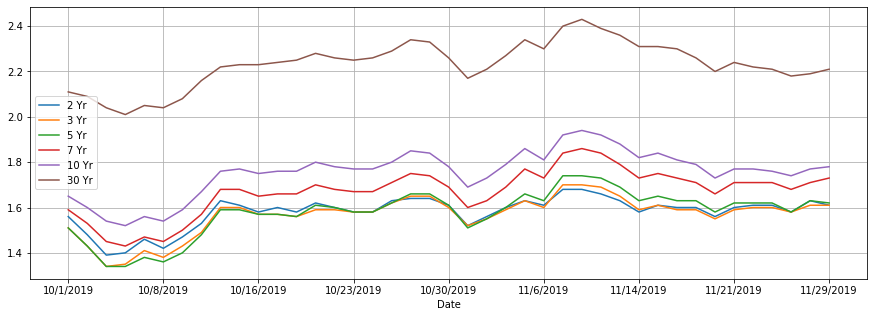

In [12]:
# 4.1 Graph the 6 benchmark securities for the 2 months on 1 plot.  That means the 6 yield series are overlaid on the same area.  Add a legend
%matplotlib inline
TreasuryYield.plot(figsize=(15,5), grid=True)

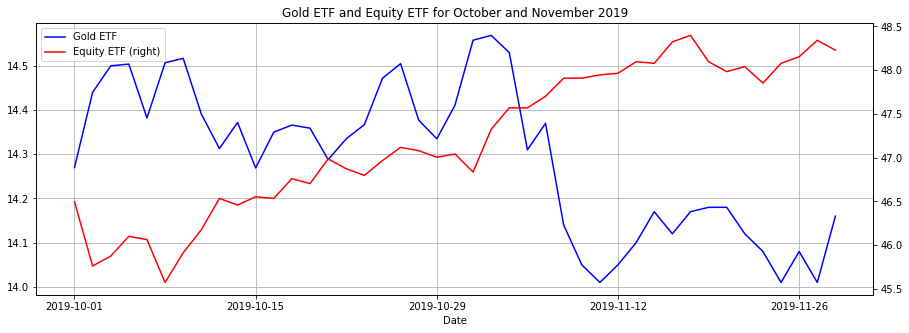

In [13]:
# 4.2 On a separate graph, plot the gold ETF prices (not returns!) for the 2 months.  Use the left-side axis for the price label
# 4.3 On the same graph, plot the equity ETF prices (not returns!) for the 2 months.  Be sure to use a separate scale, and the right-side axis for the price label
plt.figure(figsize=(15,5))
plt.title('Gold ETF and Equity ETF for October and November 2019')
ax1 = GoldETF["Adj Close"].plot(color='blue', grid=True, label='Gold ETF')
ax2 = EquityETF["Adj Close"].plot(color='red', grid=True, secondary_y=True,
label='Equity ETF')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

## 5.0 Fitting the Yield Curve
5.1 Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve. Write out the equation.
In the Nelson-Siegel model, the function to fit the forward rate curve f(τ) as follows:
𝑓(τ) = 𝛽1 + 𝛽2exp(-τ/𝜆1) + 𝛽3(τ/𝜆1)exp(-τ/𝜆1) + 𝛽4(τ/𝜆2)exp(-τ/𝜆2)

The zero-coupon yield curve is equal to the average of the forward rates, it can be implied as:
𝑟(τ) = 𝛽1 + 𝛽2((1-exp(-τ/𝜆1))/(τ/𝜆1)) + 𝛽3((1-exp(-τ/𝜆1))/(τ/𝜆1))-exp(-τ/𝜆1)) + 𝛽4((1-exp(-τ/𝜆2))/(τ/𝜆2))-exp(-τ/𝜆2))

where 𝑟(τ) is the zero-coupon yield with τ months to maturity, τ is time to maturity, λ is a constant the controls the decay rate and β1, β2, β3 are latent parameters.

5.2 Fit the yield curve each day using the 6 benchmark yields for the October data

NelsonSiegelSvenssonCurve(beta0=2.998616161760759, beta1=-1.0634499143590337, beta2=-1.9803867402758184, beta3=-2.4265791839064654, tau1=2.081078114382581, tau2=8.519981131911877)


C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


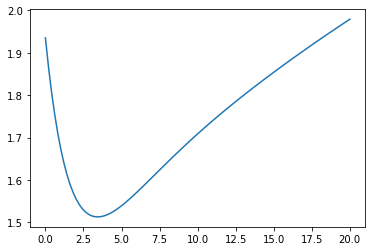

In [14]:
t = np.array([2.0,3.0,5.0,7.0,10.0,30.0])
y = np.array(np.mean(TreasuryYieldOct))
curve_fit, status = calibrate_nss_ols(t,y)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_ZC
Oct_curve, status = calibrate_nss_ols(t,NSS_ZC)
assert status.success
print(Oct_curve)
t = np.linspace(0,20,100)
plt.plot(t,Oct_curve(t))
plt.show()

# 5.3 Fit the yield curve each day using the 6 benchmark yields for the November data

NelsonSiegelSvenssonCurve(beta0=6.528401966989768, beta1=-4.620817400557989, beta2=-4.059304527383874, beta3=-11.747742939305004, tau1=2.641128431248856, tau2=14.762164918624613)


C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


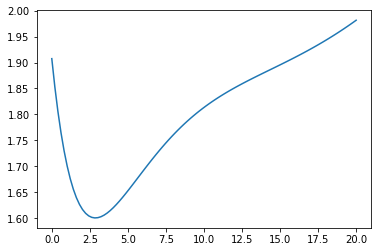

In [15]:
t =np.array([2.0,3.0,5.0,7.0,10.0,30.0])
y = np.array(np.mean(TreasuryYieldNov))
curve_fit, status = calibrate_nss_ols(t,y)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_ZC
Nov_curve, status = calibrate_nss_ols(t,NSS_ZC)
assert status.success
print(Nov_curve)
t = np.linspace(0,20,100)
plt.plot(t,Nov_curve(t))
plt.show()

# 5.4 What are the significant changes, if any? Be specific with regards to the values of the parameters! --- Discuss as a group and include the answer in the html document for this question.
The Nielson-Siegel-Svensson model was used to fit the yield curves for US treasury yields for October and November respectively.

It is evident from the graph that the average yield for year zero in October was approximately 1.9 which decreased sharply to 1.52 in about year 3 from which again we saw a steady increase to about 2.0 after the twentieth year of the maturity period. For the month of November, the yield curve starting at approximately 1.83 in year zero and sharply also decreased to 1.60 in year 3, but then started to increase close to 1.84 in year 11 and decreased to approximately 1.72 by the twentieth year of the maturity period.

Comparing the two months of October and November it suffice to conclude that, the T-bills invested in October will yield higher return in the long run than the October T-bills.

# 6.0 Modeling Prices

## 6.1 Using the October gold ETF prices, run an ARMA model with your choice of parameters.
## 6.2 Using the November gold ETF prices, run an ARMA model with your choice of parameters.

In [16]:
GoldETF.index = pd.to_datetime(GoldETF.index)
y_GoldETF = GoldETF['Adj Close']

In [17]:
# Test for Stationarity
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(y_GoldETF)

(0.48999357468883686, True)

In [18]:
# Estimate the best lag term with several statistical tests
kpss_diffs_GoldETF = ndiffs(y_GoldETF, alpha=0.05, test='kpss', max_d=6)
adf_diffs_GoldETF = ndiffs(y_GoldETF, alpha=0.05, test='adf', max_d=6)
n_diffs_GoldETF = max(adf_diffs_GoldETF, kpss_diffs_GoldETF)

print(f"Estimated differencing term: {n_diffs_GoldETF}")

Estimated differencing term: 2


In [19]:
# Use auto_arima to fit a model on the data
auto = pm.auto_arima(y_GoldETF, d=n_diffs_GoldETF, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-66.952, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-49.273, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-59.403, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-51.272, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-65.874, Time=0.31 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0] intercept
Total fit time: 2.602 seconds


In [20]:
print(auto.order)

(2, 2, 2)


------------------------------------------------------------------------------
ARMA model for gold ETF in October
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   23
Model:                 ARIMA(2, 2, 2)   Log Likelihood                  19.572
Date:                Sat, 16 Apr 2022   AIC                            -29.145
Time:                        14:47:27   BIC                            -23.922
Sample:                    10-01-2019   HQIC                           -28.011
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8031      0.485     -1.655      0.098      -1.754       0.148
ar.L2          0.

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

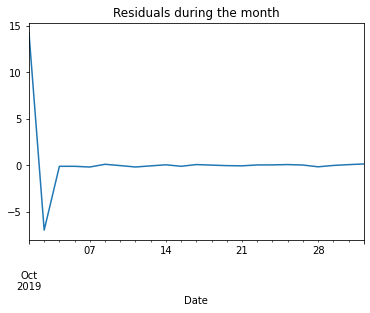

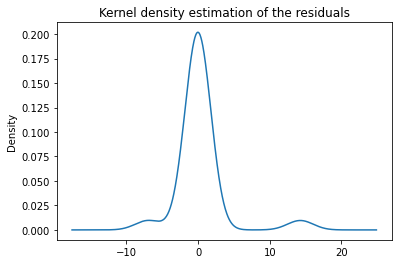

------------------------------------------------------------------------------
ARMA model for gold ETF in November
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   20
Model:                 ARIMA(2, 2, 2)   Log Likelihood                  18.211
Date:                Sat, 16 Apr 2022   AIC                            -26.422
Time:                        14:47:27   BIC                            -21.971
Sample:                             0   HQIC                           -25.809
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2055      1.224     -0.168      0.867      -2.605       2.194
ar.L2          0

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

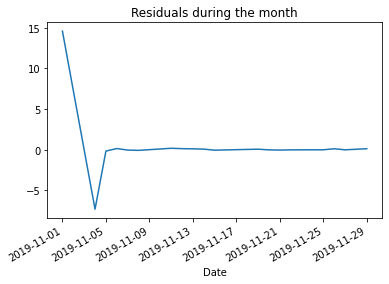

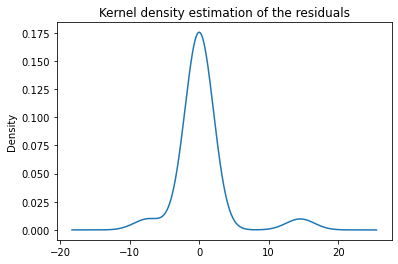

In [21]:
def get_data(df, month, column):
 return df[(df.index >= f"2019-{month:02d}-01") & (df.index < f"2019-{(month+1):02d}-01")][column]

def fit_arima(data):
 model = ARIMA(data, order=(2,2,2))
 model_fit = model.fit()
 print(model_fit.summary())
 residuals = pd.DataFrame(model_fit.resid)
 ax1 = residuals.plot(label='residual')
 plt.title("Residuals during the month")
 ax1.get_legend().remove()
 plt.show()
 ax2 = residuals.plot(kind='kde')
 plt.title("Kernel density estimation of the residuals")
 ax2.get_legend().remove()
 plt.show()
        
df_name = {0: "gold ETF"}
month_name = {10: "October", 11: "November"}
for index, df in enumerate([GoldETF]):
    for month in [10, 11]:
        print("-" * 78)
        print(f"ARMA model for {df_name[index]} in {month_name[month]}")
        data = get_data(df, month, "Adj Close")
        fit_arima(data)

## 6.3 Using the October equity ETF prices, run an ARMA model with your choice of parameters.
## 6.4 Using the November equity ETF prices, run an ARMA model with your choice of parameters.

In [22]:
EquityETF.index = pd.to_datetime(EquityETF.index)
y_EquityETF = EquityETF['Adj Close']

In [23]:
# Test for Stationarity
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(y_EquityETF)

(0.6537951903374064, True)

In [24]:
# Estimate the best lag term with several statistical tests
kpss_diffs_EquityETF = ndiffs(y_EquityETF, alpha=0.05, test='kpss', max_d=6)
adf_diffs_EquityETF = ndiffs(y_EquityETF, alpha=0.05, test='adf', max_d=6)
n_diffs_EquityETF = max(adf_diffs_EquityETF, kpss_diffs_EquityETF)

print(f"Estimated differencing term: {n_diffs_EquityETF}")

Estimated differencing term: 2


In [25]:
# Use auto_arima to fit a model on the data
auto = pm.auto_arima(y_EquityETF, d=n_diffs_EquityETF, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=23.670, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=18.379, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=21.769, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=15.890, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4.752, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=6.746, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=6.628, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=3.030, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=14.025, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5.027, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=4.959, Time=0.10 sec
 ARIMA(2,2,1)(0

In [26]:
print(auto.order)

(3, 2, 0)


------------------------------------------------------------------------------
ARMA model for equity ETF in October
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   23
Model:                 ARIMA(3, 2, 0)   Log Likelihood                   1.051
Date:                Sat, 16 Apr 2022   AIC                              5.898
Time:                        14:51:08   BIC                             10.076
Sample:                    10-01-2019   HQIC                             6.804
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7920      0.164     -4.830      0.000      -1.113      -0.471
ar.L2         -

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


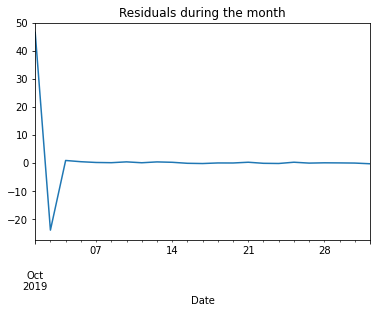

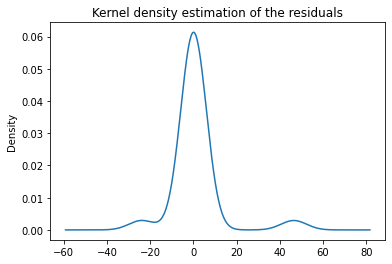

------------------------------------------------------------------------------
ARMA model for equity ETF in November
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   20
Model:                 ARIMA(3, 2, 0)   Log Likelihood                   6.107
Date:                Sat, 16 Apr 2022   AIC                             -4.214
Time:                        14:51:08   BIC                             -0.652
Sample:                             0   HQIC                            -3.723
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7801      0.358     -2.180      0.029      -1.481      -0.079
ar.L2         

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


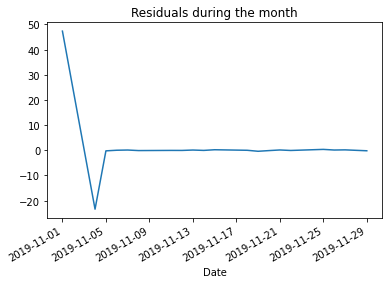

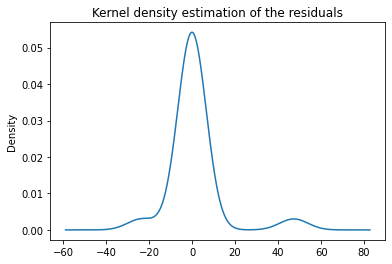

In [27]:
def get_data(df, month, column):
 return df[(df.index >= f"2019-{month:02d}-01") & (df.index < f"2019-{(month+1):02d}-01")][column]

def fit_arima(data):
 model = ARIMA(data, order=(3,2,0))
 model_fit = model.fit()
 print(model_fit.summary())
 residuals = pd.DataFrame(model_fit.resid)
 ax1 = residuals.plot(label='residual')
 plt.title("Residuals during the month")
 ax1.get_legend().remove()
 plt.show()
 ax2 = residuals.plot(kind='kde')
 plt.title("Kernel density estimation of the residuals")
 ax2.get_legend().remove()
 plt.show()
        
df_name = {0: "equity ETF"}
month_name = {10: "October", 11: "November"}
for index, df in enumerate([EquityETF]):
    for month in [10, 11]:
        print("-" * 78)
        print(f"ARMA model for {df_name[index]} in {month_name[month]}")
        data = get_data(df, month, "Adj Close")
        fit_arima(data)

## 6.4 In each case, justify which model is best.
The best fit ARMA model is with the model with lowest AIC and SBC value. A Ljung-Box test on the residuals helps us determine the best fit model based on different parameters. The log-likelihood value is a simpler representation of the maximum likelihood estimation.

ARIMA (2,2,2) for October is the best fit model for gold ETF as it has lower AIC and SBC value than gold ETF ARIMA model in November. Ljung-Box test shows that both of their p-values of the test are greater than 0.05 which means the residuals for both of our time series model are independently distributed and provide an adequate fit to the data. ARIMA model for October is also better as it has a higher log-likelihood value than ARIMA model for November.

ARIMA (3,2,0) for November is the best fit model for equity ETF as it has lower AIC and SBC value than equity ETF ARIMA model in October. Ljung-Box test shows that both of their p-values of the test are greater than 0.05 which means the residuals for both of our time series model are independently distributed and provide an adequate fit to the data. ARIMA model for November is also better as it has a higher log-likelihood value than ARIMA model for October.

## 6.5 What are the significant changes, if any? Be specific with regards to the values of the parameters! --- Discuss as a group and include the answer in the html document for this question.
For gold ETF, the major change between Arima model for October and November is the change in skewness under the Jarque-Bera test, where gold ETF in October has a slight negative skew with larger kurtosis while gold ETF in November has an expected skewness of close to 0 with a smaller kurtosis. Thus, the data for gold ETF in November is more normally distributed against the gold ETF in October.

For equity ETF, the major change between Arima model for October and November is also the change in skewness under the Jarque-Bera test, where equity ETF in October has an expected skewness of close to 0 with a smaller kurtosis while equity ETF in November has a slight negative skew with larger kurtosis. Thus, the data for equity ETF in October is more normally distributed against the equity ETF in November. Besides that, equity ETF in November has a larger Log Likelihood which means it has a better goodness of fit for the model compared to equity ETF in October.

# Modelling Volatility

In [28]:
tickerSymbol = "SGOL"
tickerData = yf.Ticker(tickerSymbol)
#historical prices for this ticker
goldDf = tickerData.history(period='1d', start='2019-10-2', end='2019-11-30')
goldOctDf = tickerData.history(period='1d', start='2019-10-2', end='2019-10-31')
goldNovDf = tickerData.history(period='1d', start='2019-11-2', end='2019-11-30')
goldDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-01,14.106,14.314,14.085,14.270,939000,0,0.0
2019-10-02,14.392,14.500,14.355,14.440,2038000,0,0.0
2019-10-03,14.447,14.626,14.440,14.500,6204000,0,0.0
2019-10-04,14.473,14.551,14.433,14.504,659000,0,0.0
2019-10-07,14.433,14.484,14.347,14.382,628000,0,0.0


## 7.1 Using gold ETF prices, find the daily high minus low for each month. Compute the average for October. Compute the average for November.

In [29]:
goldOctDf['HighLowDiff'] = goldOctDf["High"] - goldOctDf["Low"]
goldNovDf['HighLowDiff'] = goldNovDf["High"] - goldNovDf["Low"]
print(goldOctDf['HighLowDiff'].head())
print(goldNovDf['HighLowDiff'].head())

Date
2019-10-01    0.229000
2019-10-02    0.145000
2019-10-03    0.186001
2019-10-04    0.118000
2019-10-07    0.137000
Name: HighLowDiff, dtype: float64
Date
2019-11-01    0.082000
2019-11-04    0.170000
2019-11-05    0.180000
2019-11-06    0.070001
2019-11-07    0.270000
Name: HighLowDiff, dtype: float64


In [30]:
print("Gold Oct 19 high-low diff average: " + str(goldOctDf['HighLowDiff'].mean()))
print("Gold Nov 19 high-low diff average: "+ str(goldNovDf['HighLowDiff'].mean()))

Gold Oct 19 high-low diff average: 0.11172728105024858
Gold Nov 19 high-low diff average: 0.12109999656677246


## 7.2 Using the gold ETF returns, find the standard deviation for October. Repeat for November

In [31]:
goldOctRet = goldOctDf['Close'].pct_change().dropna()
goldOctStd = goldOctRet.std()
print("Gold Oct returns std: " + str(goldOctStd))
goldNovRet = goldNovDf['Close'].pct_change().dropna()
goldNovStd = goldNovRet.std()
print("Gold Nov returns std: " + str(goldNovStd))

Gold Oct returns std: 0.006005129701703837
Gold Nov returns std: 0.006680357150625811


## 7.3 Using the October gold ETF returns, find a GARCH(1,1) model. Repeat for November (3 points)

### GARCH(1,1) model for October

In [32]:
train = goldOctRet[:20]
test = goldOctRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12251925.264240215
Iteration:      2,   Func. Count:     13,   Neg. LLF: 52.86805557946196
Iteration:      3,   Func. Count:     20,   Neg. LLF: 19.396057202177605
Iteration:      4,   Func. Count:     26,   Neg. LLF: 18.81553084461432
Iteration:      5,   Func. Count:     32,   Neg. LLF: 18.072357631939806
Iteration:      6,   Func. Count:     38,   Neg. LLF: 29.934052299344525
Iteration:      7,   Func. Count:     45,   Neg. LLF: 17.861528349056368
Iteration:      8,   Func. Count:     51,   Neg. LLF: 17.822195673696253
Iteration:      9,   Func. Count:     57,   Neg. LLF: 17.68964329336945
Iteration:     10,   Func. Count:     63,   Neg. LLF: 17.55745361090185
Iteration:     11,   Func. Count:     68,   Neg. LLF: 17.541496243652542
Iteration:     12,   Func. Count:     73,   Neg. LLF: 17.536512809876324
Iteration:     13,   Func. Count:     78,   Neg. LLF: 17.528071284951668
Iteration:     14,   Func. Count:     83,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -17.4969
Distribution:                  Normal   AIC:                           42.9938
Method:            Maximum Likelihood   BIC:                           46.9767
                                        No. Observations:                   20
Date:                Sat, Apr 16 2022   Df Residuals:                       19
Time:                        14:58:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         8.9912e-03      0.123  7.295e-02      0.942 [ -0.233,  0.251]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      8.7530e-03  7.143e-02      0.123      0.902 [ -0.131,  0.149]
alpha[1]   6.2589e-15  9.926e-02  6.306e-14      1.000 [ -0.195,  0.195]
beta[1]        0.9471      0.323      2.929  3.404e-03 [  0.313,  1.581]
========================================================================

Covariance estimator: robust
"""

In [33]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,predicted_price
Date,
2019-10-24,0.002399
2019-10-25,0.002360
2019-10-28,0.002323
2019-10-29,0.002287
2019-10-30,0.002254


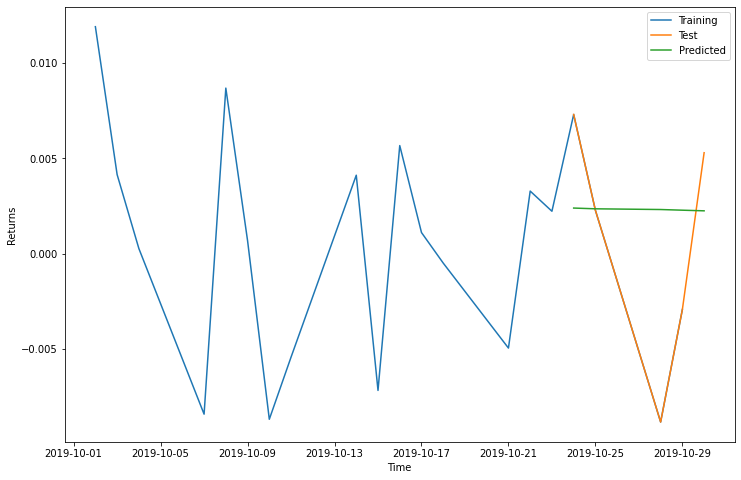

In [34]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

### GARCH(1,1) model for November

In [35]:
train = goldNovRet[0:17]
test = goldNovRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 211262334.35630554
Iteration:      2,   Func. Count:     13,   Neg. LLF: 7047679.911906794
Iteration:      3,   Func. Count:     20,   Neg. LLF: 15.579183108155451
Iteration:      4,   Func. Count:     26,   Neg. LLF: 19.174636453309905
Iteration:      5,   Func. Count:     32,   Neg. LLF: 15.171588831858104
Iteration:      6,   Func. Count:     38,   Neg. LLF: 18.28234884320546
Iteration:      7,   Func. Count:     45,   Neg. LLF: 15.020610553645259
Iteration:      8,   Func. Count:     50,   Neg. LLF: 14.86537367143488
Iteration:      9,   Func. Count:     55,   Neg. LLF: 14.677590104719737
Iteration:     10,   Func. Count:     60,   Neg. LLF: 14.631482071089282
Iteration:     11,   Func. Count:     65,   Neg. LLF: 14.627203125086098
Iteration:     12,   Func. Count:     70,   Neg. LLF: 14.626118939421929
Iteration:     13,   Func. Count:     75,   Neg. LLF: 14.626114934537831
Iteration:     14,   Func. Count:     79,   Neg. LLF: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -14.6261
Distribution:                  Normal   AIC:                           37.2522
Method:            Maximum Likelihood   BIC:                           40.5851
                                        No. Observations:                   17
Date:                Sat, Apr 16 2022   Df Residuals:                       16
Time:                        15:00:16   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1380      0.134     -1.031      0.302 [ -0.400,  0.124]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.7542e-09  2.874e-02  1.306e-07      1.000 [-5.632e-02,5.632e-02]
alpha[1]   2.4065e-14  4.535e-02  5.307e-13      1.000 [-8.889e-02,8.889e-02]
beta[1]        0.9367      0.157      5.952  2.648e-09      [  0.628,  1.245]
=============================================================================

Covariance estimator: robust
"""

In [36]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,predicted_price
Date,
2019-11-22,0.001427
2019-11-25,0.001336
2019-11-26,0.001252
2019-11-27,0.001172
2019-11-29,0.001098


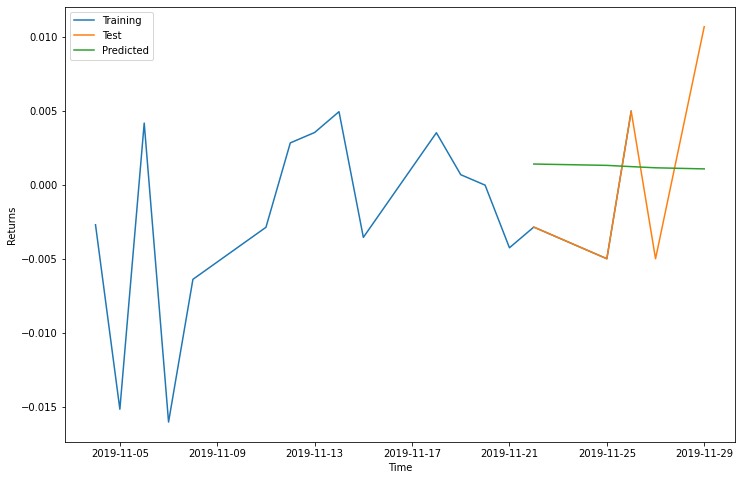

In [37]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

## 7.4 What are the significant changes, if any? Be specific with regards to the values of the parameters! --- Discuss as a group and include the answer in the html document for this question.
Since the return values were small, it becomes difficult for the GARCH model computationally to work with values near zero. The returns were scaled up by multiplting by a factor of 100 during training, so that the GARCH model is able to fit correctly.Then the predicted values were scaled down by dividing by 100.

### GARCH(1,1) is used for both the months.

The lower standard deviation, lower AIC and BIC value and higher log likelihood clearly states that Garch (1,1) model for gold ETF November is a better fit model as compared to gold ETF October.

The higher beta for the month of October indicates higher volatility persistency than November.

In [38]:
tickerSymbol = "BBCA"
tickerData = yf.Ticker(tickerSymbol)
equityDf = tickerData.history(period='1d', start='2019-10-2', end='2019-11-30')
equityOctDf = tickerData.history(period='1d', start='2019-10-2', end='2019-10-31')
equityNovDf = tickerData.history(period='1d', start='2019-11-2', end='2019-11-30')
equityDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-01,46.985543,47.023102,46.347050,46.365829,127400,0,0
2019-10-02,46.215600,46.215600,45.389314,45.633442,113350,0,0
2019-10-03,45.426870,45.746117,45.220298,45.746117,67200,0,0
2019-10-04,45.802445,46.027797,45.746110,45.971458,65950,0,0
2019-10-07,45.896351,46.121699,45.877571,45.933907,56350,0,0


## 7.5 Using equity ETF prices, find the daily high minus low for each month. Compute the average for October. Compute the average for November.

In [39]:
equityOctDf['HighLowDiff'] = equityOctDf["High"] - equityOctDf["Low"]
equityNovDf['HighLowDiff'] = equityNovDf["High"] - equityNovDf["Low"]
print(equityOctDf['HighLowDiff'].head())
print(equityNovDf['HighLowDiff'].head())

Date
2019-10-01    0.676052
2019-10-02    0.826285
2019-10-03    0.525819
2019-10-04    0.281687
2019-10-07    0.244128
Name: HighLowDiff, dtype: float64
Date
2019-11-01    0.394361
2019-11-04    0.244132
2019-11-05    0.244132
2019-11-06    0.300467
2019-11-07    0.169013
Name: HighLowDiff, dtype: float64


In [40]:
print("Equity ETF Oct 19 high-low diff average: " + str(equityOctDf['HighLowDiff'].mean()))
print("Equity ETF Nov 19 high-low diff average: " + str(equityNovDf['HighLowDiff'].mean()))

Equity ETF Oct 19 high-low diff average: 0.32522126747934943
Equity ETF Nov 19 high-low diff average: 0.24506905993829306


## 7.6 Using equity ETF returns, find the standard deviation for October. Repeat for November

In [41]:
equityOctRet = equityOctDf['Close'].pct_change().dropna()
equityOctStd = equityOctRet.std()
print("Equity Oct std: " + str(equityOctStd))
equityNovRet = equityNovDf['Close'].pct_change().dropna()
equityNovStd = equityNovRet.std()
print("Equity Nov std: " + str(equityNovStd))

Equity Oct std: 0.0056530509751161785
Equity Nov std: 0.0031415662737075034


## 7.7 Using October equity ETF returns, find a GARCH(1,1) model. Repeat for November (3 points)
### GARCH(1,1) model for October

In [42]:
train = equityOctRet[0:16]
test = equityOctRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28674665.245907784
Iteration:      2,   Func. Count:     12,   Neg. LLF: 24180855.55776245
Iteration:      3,   Func. Count:     19,   Neg. LLF: 15.32981456590148
Iteration:      4,   Func. Count:     25,   Neg. LLF: 14.198099311852808
Iteration:      5,   Func. Count:     31,   Neg. LLF: 13.487356717057457
Iteration:      6,   Func. Count:     36,   Neg. LLF: 13.717453797318598
Iteration:      7,   Func. Count:     42,   Neg. LLF: 13.098513927739246
Iteration:      8,   Func. Count:     47,   Neg. LLF: 13.098169341573463
Iteration:      9,   Func. Count:     52,   Neg. LLF: 13.0981664826987
Iteration:     10,   Func. Count:     56,   Neg. LLF: 13.098166482769352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13.0981664826987
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13.0982
Distribution:                  Normal   AIC:                           34.1963
Method:            Maximum Likelihood   BIC:                           37.2867
                                        No. Observations:                   16
Date:                Sat, Apr 16 2022   Df Residuals:                       15
Time:                        15:07:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0802      0.150      0.534      0.593 [ -0.214,  0.374]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      3.8493e-09  5.164e-02  7.454e-08      1.000 [ -0.101,  0.101]
alpha[1]       0.0000      0.175      0.000      1.000 [ -0.344,  0.344]
beta[1]        0.9096      0.394      2.309  2.093e-02 [  0.138,  1.682]
========================================================================

Covariance estimator: robust
"""

In [43]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,predicted_price
Date,
2019-10-24,0.000977
2019-10-25,0.000889
2019-10-28,0.000808
2019-10-29,0.000735
2019-10-30,0.000669


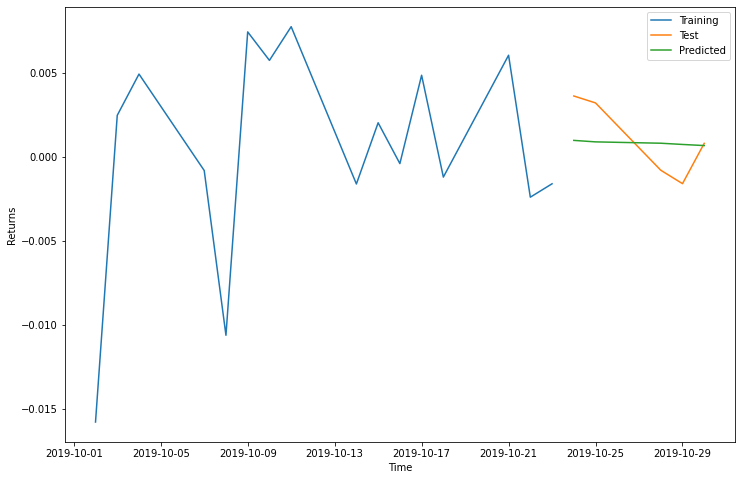

In [44]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

## GARCH(1,1) model for November

In [45]:
train = equityNovRet[0:17]
test = equityNovRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 32.33545362209962
Iteration:      2,   Func. Count:     14,   Neg. LLF: 44.75619715480401
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3.853611618465602
Iteration:      4,   Func. Count:     27,   Neg. LLF: 3.7692047845048293
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3.766433683077366
Iteration:      6,   Func. Count:     37,   Neg. LLF: 3.766393936331757
Iteration:      7,   Func. Count:     41,   Neg. LLF: 3.7663939457328115
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.766393936331757
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7


C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09296. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3.76639
Distribution:                  Normal   AIC:                           15.5328
Method:            Maximum Likelihood   BIC:                           18.8656
                                        No. Observations:                   17
Date:                Sat, Apr 16 2022   Df Residuals:                       16
Time:                        15:09:25   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1115  7.294e-02      1.529      0.126 [-3.143e-02,  0.254]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.8605e-03  3.306e-02  5.627e-02      0.955 [-6.295e-02,6.667e-02]
alpha[1]       0.0000  7.432e-02      0.000      1.000      [ -0.146,  0.146]
beta[1]        1.0000      0.367      2.726  6.415e-03      [  0.281,  1.719]
=============================================================================

Covariance estimator: robust
"""

In [46]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,predicted_price
Date,
2019-11-22,0.001177
2019-11-25,0.001195
2019-11-26,0.001214
2019-11-27,0.001232
2019-11-29,0.001251


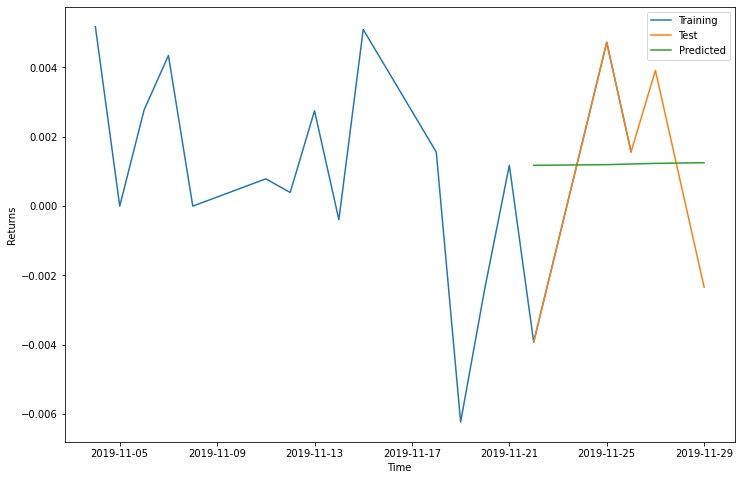

In [47]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

## 7.8 What are the significant changes, if any? Be specific with regards to the values of the parameters! --- Discuss as a group and include the answer in the html document for this question.
NOTE: Similar to gold returns GARCH model, the returns of equity ETF were scaled up by multiplting by a factor of 100 during training, so that the GARCH model is able to fit correctly. Then the predicted values were scaled down by dividing by 100.

### GARCH(1,1) is also used for both the months.

The lower standard deviation, lower AIC and BIC value and higher log likelihood clearly states that Garch (1,1) model for equity ETF November is a better fit model as compared to equity ETF October.

The higher beta for the month of November indicates higher volatility persistency than October.

In [48]:
tickerSymbol = "SGOL"
tickerData = yf.Ticker(tickerSymbol)
#historical prices for this ticker
goldDf = tickerData.history(period='1d', start='2019-10-2', end='2019-11-30')
goldOctDf = tickerData.history(period='1d', start='2019-10-2', end='2019-10-31')
goldNovDf = tickerData.history(period='1d', start='2019-11-2', end='2019-11-30')
goldDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-01,14.106,14.314,14.085,14.270,939000,0,0.0
2019-10-02,14.392,14.500,14.355,14.440,2038000,0,0.0
2019-10-03,14.447,14.626,14.440,14.500,6204000,0,0.0
2019-10-04,14.473,14.551,14.433,14.504,659000,0,0.0
2019-10-07,14.433,14.484,14.347,14.382,628000,0,0.0


In [49]:
tickerSymbol = "BBCA"
tickerData = yf.Ticker(tickerSymbol)
equityDf = tickerData.history(period='1d', start='2019-10-2', end='2019-11-30')
equityOctDf = tickerData.history(period='1d', start='2019-10-2', end='2019-10-31')
equityNovDf = tickerData.history(period='1d', start='2019-11-2', end='2019-11-30')
equityDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-01,46.985543,47.023102,46.347050,46.365829,127400,0,0
2019-10-02,46.215592,46.215592,45.389306,45.633434,113350,0,0
2019-10-03,45.426866,45.746113,45.220294,45.746113,67200,0,0
2019-10-04,45.802445,46.027797,45.746110,45.971458,65950,0,0
2019-10-07,45.896343,46.121692,45.877564,45.933899,56350,0,0


In [50]:
goldOctRet = goldOctDf['Close'].pct_change().dropna()
goldNovRet = goldNovDf['Close'].pct_change().dropna()
equityOctRet = equityOctDf['Close'].pct_change().dropna()
equityNovRet = equityNovDf['Close'].pct_change().dropna()

## 8.0 Correlation
### 8.1 Compute the Pearson correlation between the gold and equity returns in October 2019. Repeat for November 2019. --- Interpret the results as a group and include the answer in the html document for this question. The interpretation should discuss the degree of correlation, and if it is affected by extreme returns.

In [51]:
oct_corr, _ = pearsonr(goldOctRet, equityOctRet)
nov_corr, _ = pearsonr(goldNovRet, equityNovRet)
print ("Oct corr: " + str(oct_corr))
print ("Nov corr: " + str(nov_corr))

Oct corr: -0.5357581319254247
Nov corr: -0.285305496816357


Both coefficients are negative values which indicates a negative correlation between the two assets, with the increase in the value of one asset tying to the other asset’s decrease. In terms of the strength of correlation, coefficient value in October shows moderately negative correlation and coefficient value in November shows weakly negative correlation. Thus, this is an ideal portfolio construction because the less correlated our portfolio, the less risk involved, and the safer our investments.